In [1]:
import pandas as pd

df = pd.read_pickle("predictions_pkl")

In [2]:
df

,item_id,name,predictions
0,1193,One Flew Over the Cuckoo's Nest (1975),4.275939
1,661,James and the Giant Peach (1996),3.321860
2,914,My Fair Lady (1964),3.961499
3,3408,Erin Brockovich (2000),3.763712
4,2355,"Bug's Life, A (1998)",3.759617
...,...,...,...
919876,2198,Modulations (1998),3.406296
940262,2703,Broken Vessels (1998),3.306919
957826,2845,White Boys (1999),3.203340
970914,3607,One Little Indian (1973),3.399517


In [35]:
import math
ranges = []
for i in range(math.floor(df["predictions"].min()),math.ceil(df["predictions"].max()) + 1):

    if i != math.floor(df["predictions"].min()):
        ranges.append(i - 0.5)

    ranges.append(i)

ranges

[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

Text(0, 0.5, 'number of items')

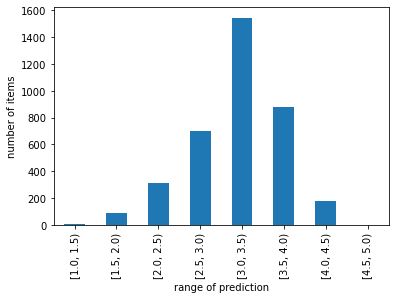

In [45]:
import numpy as np
import matplotlib.pyplot as plt


tmp = df.copy()
tmp["predictions"] = pd.cut(tmp.predictions, bins=ranges, right=False)
tmp = tmp.groupby("predictions").count()

ax = tmp.item_id.plot.bar()

ax.set_xlabel("range of prediction")
ax.set_ylabel("number of items")




In [27]:
df

,item_id,name,predictions
0,1193,One Flew Over the Cuckoo's Nest (1975),4.275939
1,661,James and the Giant Peach (1996),3.321860
2,914,My Fair Lady (1964),3.961499
3,3408,Erin Brockovich (2000),3.763712
4,2355,"Bug's Life, A (1998)",3.759617
...,...,...,...
919876,2198,Modulations (1998),3.406296
940262,2703,Broken Vessels (1998),3.306919
957826,2845,White Boys (1999),3.203340
970914,3607,One Little Indian (1973),3.399517


In [23]:
df.loc[df["predictions"] == df["predictions"].max()]

,item_id,name,predictions
21627,2905,Sanjuro (1962),4.465499


In [34]:
df.sort_values(by="predictions", ascending=False).head(10)

,item_id,name,predictions
21627,2905,Sanjuro (1962),4.465499
2185,2019,Seven Samurai (The Magnificent Seven) (Shichin...,4.415583
172,318,"Shawshank Redemption, The (1994)",4.403404
29,745,"Close Shave, A (1995)",4.390116
23,527,Schindler's List (1993),4.383325
3801,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.359447
761,1148,"Wrong Trousers, The (1993)",4.358988
903,750,Dr. Strangelove or: How I Learned to Stop Worr...,4.339090
932,904,Rear Window (1954),4.337818
10930,1178,Paths of Glory (1957),4.331529


In [46]:
x =df.sort_values(by="predictions", ascending=False).head(10)
x

,item_id,name,predictions
21627,2905,Sanjuro (1962),4.465499
2185,2019,Seven Samurai (The Magnificent Seven) (Shichin...,4.415583
172,318,"Shawshank Redemption, The (1994)",4.403404
29,745,"Close Shave, A (1995)",4.390116
23,527,Schindler's List (1993),4.383325
3801,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.359447
761,1148,"Wrong Trousers, The (1993)",4.358988
903,750,Dr. Strangelove or: How I Learned to Stop Worr...,4.339090
932,904,Rear Window (1954),4.337818
10930,1178,Paths of Glory (1957),4.331529


In [66]:
top_10 = [[a]+[b] for a,b in zip(x.name.to_list() ,x.predictions.to_list())]

rated = [[a]+[b] for a,b in zip(tmp.reset_index().predictions.astype("str").to_list() ,tmp.item_id.to_list())]

In [77]:
df2 = pd.read_excel("/Users/damiangorcak/Downloads/jokes.xlsx",header=None)
df2 = df2.rename(columns={0:"name"})


In [79]:
df2["joke_id"] = df2.index
df2["joke_id"] = df2["joke_id"] + 1

df2.to_csv("joke.csv")


In [26]:

tmp = df3


In [61]:

df_melt=pd.melt(df3, id_vars=["index"], value_vars=df3.columns)
df_melt = df_melt.rename(columns={"index":"user_id","variable":"joke_id","value":"rating"})
df_melt.rating.astype("float")
df_melt = df_melt.loc[df_melt["rating"] != 99.00]
df_melt['rating'] = df_melt['rating'].apply(lambda x: x/10.00 if x >= 10.00 else x)
df_melt
df_melt.to_csv("jokes_data.csv")

In [46]:

df3["index"]= df3.index
df3

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,index
0,1.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00,0
1,1.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00,1
2,4.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00,2
3,47.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.00,5.61,-4.51,0.00,0.0,99.00,0.00,5.93,4.19,3
4,13.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.00,99.00,99.00,99.00,0.0,99.00,99.00,99.00,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7694,27.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.00,0.00,0.00,0.00,99.0,0.00,0.00,0.00,99.00,7694
7695,1.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00,7695
7696,26.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,8.63,99.00,6.76,0.00,3.5,6.26,99.00,-2.66,0.65,7696
7697,64.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.00,2.05,2.05,0.73,0.0,2.97,0.57,0.00,0.00,7697
